## &#128205; Basic Setups

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# warming 제거
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**쥬피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [4]:
import matplotlib.pyplot as plt 
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

## &#128205; 1. 데이터프레임 확인

In [ ]:
df=pd.read_csv("nyc_citibike.csv",encoding='euc-kr') # 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df.head()

,start_date,end_date,start_hour,end_hour,trip_duration,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,usertype,birth_year,gender,day_since_register
0,2018-05-01,2018-05-01,4,4,390,3002,South End Ave & Liberty St,40.711512,-74.015756,79,Franklin St & W Broadway,40.719116,-74.006667,21105,Subscriber,1945,male,36
1,2018-05-01,2018-05-01,1,1,854,3611,Vernon Blvd & 47 Rd,40.744907,-73.953457,3572,34 Ave & 38 St,40.756913,-73.921631,32219,Subscriber,1998,male,29
2,2018-05-01,2018-05-01,4,4,526,515,W 43 St & 10 Ave,40.760094,-73.994618,388,W 26 St & 10 Ave,40.749718,-74.002950,33433,Subscriber,1954,male,55
3,2018-05-01,2018-05-01,3,3,885,3641,Broadway & W 25 St,40.742869,-73.989186,336,Sullivan St & Washington Sq,40.730477,-73.999061,32028,Subscriber,1963,male,32
4,2018-05-01,2018-05-01,1,1,324,3440,Fulton St & Adams St,40.692418,-73.989495,3308,Kane St & Clinton St,40.686176,-73.996453,26425,Subscriber,1965,male,34


In [2]:
# 데이터 shape 파악
df.shape

NameError: ignored

In [ ]:
# 데이터 통계량 파악
df.describe()

,start_hour,end_hour,trip_duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,birth_year,day_since_register
count,72035.000000,72035.000000,7.203500e+04,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000,72035.000000
mean,14.176775,14.372916,1.046751e+03,1535.681488,40.738587,-73.983531,1537.181287,40.738292,-73.983435,26139.737683,1977.994947,30.468522
std,4.809857,4.854897,8.139700e+03,1418.093403,0.029777,0.018456,1420.198780,0.029736,0.018639,5793.540983,11.868175,17.341855
min,0.000000,0.000000,6.100000e+01,72.000000,40.646538,-74.025353,72.000000,40.646538,-74.044247,14529.000000,1885.000000,1.000000
25%,10.000000,10.000000,3.980000e+02,382.000000,40.718939,-73.995481,382.000000,40.718939,-73.995299,20533.000000,1969.000000,15.000000
50%,15.000000,15.000000,6.810000e+02,504.000000,40.740343,-73.986580,503.000000,40.739974,-73.986580,27840.000000,1980.000000,30.000000
75%,18.000000,18.000000,1.201000e+03,3223.000000,40.758997,-73.973747,3224.000000,40.758924,-73.973747,30995.000000,1988.000000,46.000000
max,23.000000,23.000000,1.344462e+06,3680.000000,40.814394,-73.907744,3680.000000,40.814394,-73.907744,33671.000000,2002.000000,60.000000


In [ ]:
# 결측치 개수 파악
df.isnull().sum().to_frame('nan_count') 

,nan_count
start_date,0
end_date,0
start_hour,0
end_hour,0
trip_duration,0
start_station_id,0
start_station_name,0
start_station_latitude,0
start_station_longitude,0
end_station_id,0


In [ ]:
# 결측치 비율 파악
pd.DataFrame(data=df.isnull().sum()/len(df),columns=['nan_ratio'])

,nan_ratio
start_date,0.0
end_date,0.0
start_hour,0.0
end_hour,0.0
trip_duration,0.0
start_station_id,0.0
start_station_name,0.0
start_station_latitude,0.0
start_station_longitude,0.0
end_station_id,0.0


주어진 데이터에서는 결측치가 없지만, 만약에 결측치가 있다면 fillna, dropna를 사용하여 결측치를 대체하거나 제거해야 한다.

In [ ]:
# df = df.fillna(0)
# df.bike_id = df.bike_id.fillna()
# df = df.dropna(axis=0)
# df = df.dropna(axis=1)

[결측치 제거 참고](https://eda-ai-lab.tistory.com/14)

## &#128205; 2. 데이터 도메인과 변수 이해
먼저, 가지고 있는 데이터에 대해서 이해하기 위해서는 어떤 변수들이 있는지 그리고 각 변수들의 의미와 풀고자하는 문제 간의 연관성 등을 파악해야 한다.
* 변수 이름
* 변수 타입 

In [ ]:
# 변수 타입 파악
df.dtypes 

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id             int64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id               int64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

In [ ]:
#info를 쓰면 각 변수의 non-null count 까지 알 수 있어서 단순한 type 확인보다 더 많은 정보를 알 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72035 entries, 0 to 72034
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   start_date               72035 non-null  object 
 1   end_date                 72035 non-null  object 
 2   start_hour               72035 non-null  int64  
 3   end_hour                 72035 non-null  int64  
 4   trip_duration            72035 non-null  int64  
 5   start_station_id         72035 non-null  int64  
 6   start_station_name       72035 non-null  object 
 7   start_station_latitude   72035 non-null  float64
 8   start_station_longitude  72035 non-null  float64
 9   end_station_id           72035 non-null  int64  
 10  end_station_name         72035 non-null  object 
 11  end_station_latitude     72035 non-null  float64
 12  end_station_longitude    72035 non-null  float64
 13  bike_id                  72035 non-null  int64  
 14  usertype              

#### 시각화에서 중요한 건 범주형변수, 연속형변수 두가지로 구분하고 시작하는 것
> 범주형 변수 : 빈도(frequency) 계산 가능 <br/>
> 연속형 변수 : 평균, 표준편차, 분산 등의 수학적 계산 가능


- dtypes로 전체 변수 타입을 확인할때, 범주형이어도 연속형 변수 dtype일 수 있다 <br/>
- 이 예시에서는 trip_duration, day_since_register 연속형 변수, 그 외는 다 범주형<br/>
- 실제로 연속형이 아닌데, int64(연속형)인 변수들을 string으로 만들어준다

In [ ]:
df['start_station_id']=df['start_station_id'].astype(str)
df['end_station_id']=df['end_station_id'].astype(str)
df['bike_id']=df['bike_id'].astype(str)

In [ ]:
df.dtypes

start_date                  object
end_date                    object
start_hour                   int64
end_hour                     int64
trip_duration                int64
start_station_id            object
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id              object
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                     object
usertype                    object
birth_year                   int64
gender                      object
day_since_register           int64
dtype: object

* 변수들의 Segmentation
  >nyc_citibike 예시에서는. 이렇게 Segmentation 해볼 수 있다.
  >* 주행시간 변수 (start_date, end_date, start_hour, end_hour, trip_duration)
  >* 주행위치 변수 (start_station_id,start_station_name, start_station_latitude, start_station_longitutde, end_station_id,end_station_name, end_station_latitude, end_station_longitude)
  >* 대여바이크종류 변수 (bike_id)
  >* 유저정보 변수 (usertype, birth_year, gender,day_since_register)

* 단변수 분석에서, 변수들에 대해 알고 싶은 정보를 생각해낸다.
    > * 평균적 trip_duration은 얼마일까?
    > * 가장 기록(=대여 건 수)이 많은 start_hour는 언제일까?
    > * 유저들 성별 분포는 어떨까?

* 서로 영향을 줄 변수들에 대한 기대 가설을 세워본다.
    >* 신규 가입자들이 한번 탈 때 더 짧게 쓰지 않을까?
    >* gender에 따라 trip_duration이 다르지 않을까? 어떻게 다를까?
    > * start_hour이 새벽 시간대일수록 trip_duration이 짧지 않을까?

* 실제 EDA 후 기대한 가설과 결과를 보고 해석한다.

## &#128205; 3. 단일 변수 분석

### 3.1 (맞추고자 하는 타겟값 y부터 분석) 연속형 변수 분포 파악
데이터에서 예측하고자 하는 타겟 y변수가 있다면, 
타겟값부터 분석한다.
<br/> 
- 이 예시의 y값은 연속형 변수로, 이 목차는 연속형 변수에 대한 분석 방법으로 이해하면 된다. 
- **y값이 범주형 변수라면 다음 목차(범주형 변수의 빈도 파악)을 우선적으로 해주면 된다**

In [ ]:
# 분석 결과의 이해를 돕기위해 데이터 단위를 바꿔줄 수도 있다.
df['trip_duration_min']=df['trip_duration'] /60
df['trip_duration_min'].head()

0     6.500000
1    14.233333
2     8.766667
3    14.750000
4     5.400000
Name: trip_duration_min, dtype: float64

#### 3.1.1 통계량 파악

In [ ]:
df['trip_duration_min'].describe()

count    72035.000000
mean        17.445851
std        135.661662
min          1.016667
25%          6.633333
50%         11.350000
75%         20.016667
max      22407.700000
Name: trip_duration_min, dtype: float64

#### 단순히 실행 결과로 끝나지 말고 해석 보태기
> 가장 작게 빌린 건수는 1분, 평균적으로 17분을 대여한다. 최대값이 22407분인 것을 보아 outlier(정상적이지 않은 대여패턴)가 데이터에 속해 있을 것이다.

#### 3.1.2 분포(경향 위주) 파악 
데이터가 많고 연속형으로, 그 경향을 파악하기에는 <br/>
seaborn 패키지의 두 플랏을 추천. [Seaborn 활용한 Distribution 파악](https://seaborn.pydata.org/tutorial/distributions.html)<br/>
seaborn에서의 단변수 플라팅은 distplot과 kdeplot이 있는데
* **kdeplot = Kernel Density Estimation Plot.** <br/>
확률밀도가 추정되어 discrete 변수를 continuous하게 만들어 준다.
* **distplot = kdeplot + histogram** [선호]

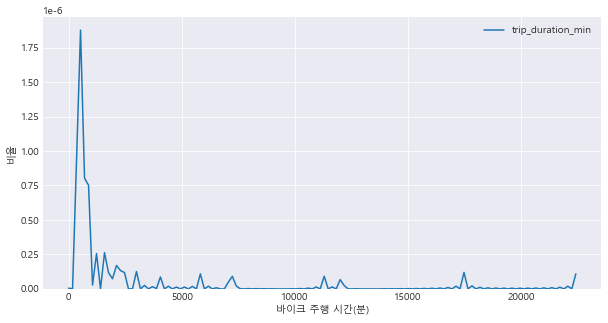

In [ ]:
# kdeplot
# 빈 캔버스 사이즈 지정
plt.figure(figsize=(10,5))

# 캔버스에 그림 그리기
kde=sns.kdeplot(df['trip_duration_min']) 
kde.set_xlabel("바이크 주행 시간(분)")
kde.set_ylabel("비율")

# 결과 캔버스 보여주기
plt.show() 

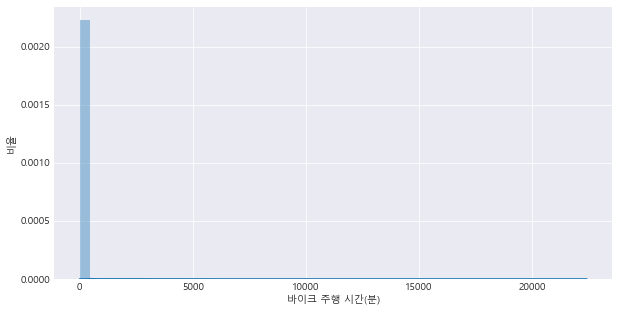

In [ ]:
# distplot
# shade 연한 하늘색이 histogram
plt.figure(figsize=(10,5))
dist=sns.distplot(df['trip_duration_min']) 
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() 

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df['trip_duration_min'].skew())
print("Kurtosis: %f" % df['trip_duration_min'].kurt())

Skewness: 116.002624
Kurtosis: 15913.196644


#### 분포를 보고 생각해야 하는 3가지
>* 
정규분포를 따르고 있는가 / 정규분포와 유사한 형태를 띄는가?<br/>**(플라팅을 통해 눈으로 or 더 정확하고 싶으면 정규분포인지 통계적으로 검정)** <br/> 
[왜 정규분포를 따라야하는지 더 알고싶으면?](https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859)
>* 눈에 띄는 치우침 정도가 있는가 (skewness)?
>* 얼마나 뾰족한가 (kurtosis)?

#### 3.1.3  (y값 기준) 이상치 제거
위에서 살펴본 바 목표로 하는 y값에 과하게 큰 값이 있어, 이상치를 제거한 후에 EDA를 진행하고자 한다.

> 아웃라이어가 y변수 분포 상에 존재하면, 향후 이진 변수 분석에서 다른 변수들과 ~ y 관계를 볼 때도 분포가 길게 늘어져 세밀하게 볼 수 없다.<br/>
> 또한 아웃라이어 존재 여부가 만들고자하는 모델에 큰 영향을 미친다,<br/>
> 그렇다고 완전히 제거하는 것보다 아웃라이어만 떼서 살펴볼 필요도 있다 <br/>**가지고 있는 데이터에 대한 의미있는 정보를 줄 수도 있기 때문이다**

* 이상치를 제거하는 방법은 아주 다양한데
* 일단은, y값 기준 최상위 1% 값을 제거하는 방식을 택한다.

In [ ]:
cut_point = df["trip_duration_min"].quantile(0.99)
df_cut=df[df['trip_duration_min'] < cut_point]

**이상치를 제거하고 분포를 다시 그려보자.**

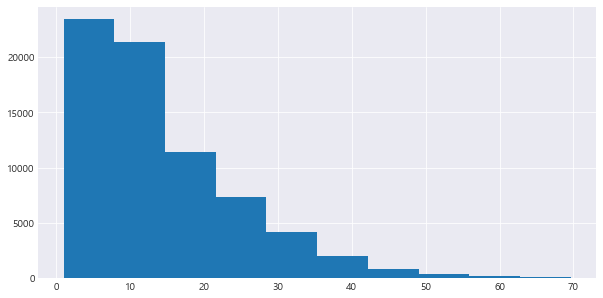

In [ ]:
# 단순 pandas visualization 활용
plt.figure(figsize=(10,5))
df_cut['trip_duration_min'].hist()
plt.show()

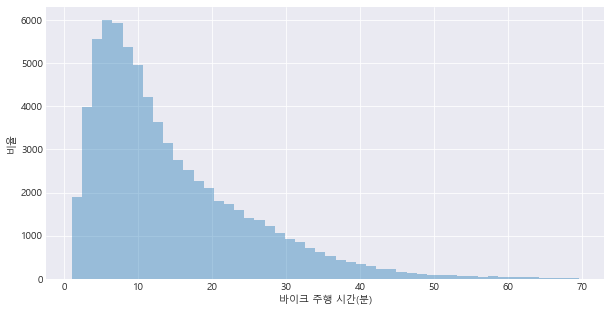

In [ ]:
# seaborn의 distplot
plt.figure(figsize=(10,5))
dist=sns.distplot(df_cut['trip_duration_min'],kde=False)
#kde=FALSE는 값, TRUE는 비율
dist.set_xlabel("바이크 주행 시간(분)")
dist.set_ylabel("비율")
plt.show() 

In [ ]:
#skewness and kurtosis
print("Skewness: %f" % df_cut['trip_duration_min'].skew())
print("Kurtosis: %f" % df_cut['trip_duration_min'].kurt())

Skewness: 1.418011
Kurtosis: 2.307984


#### 분포를 보정한 후 다시 생각해야 하는 3가지
>* 
정규분포를 따르고 있는가 / 정규분포와 유사한 형태를 띄는가?<br/>**(플라팅을 통해 눈으로 or 더 정확하고 싶으면 정규분포인지 통계적으로 검정)** <br/> 
[왜 정규분포를 따라야하는지 더 알고싶으면?](https://towardsdatascience.com/why-data-scientists-love-gaussian-6e7a7b726859)
>* 눈에 띄는 치우침 정도가 있는가 (skewness)?
>* 얼마나 뾰족한가 (kurtosis)?

### 3.2  범주형 변수의 빈도 파악

#### 3.2.1 범주형 변수가 30개 이하일 때, 빈도표(Counting and Basic Frequency Plots)
>30개가 아니더라도, 범주형 변수의 고유 값이 X축에 전부 표현될 수 있다면


 **A. Pandas visualization 활용 dataframe.plot() 형태**
 <br/> 장점: 정말 편하고, customizing이 쉽고, 구글링할 자료가 많다
 <br/> 단점: 타 패키지보다 덜 예쁘다

In [ ]:
# 대여 시작 시간대(start_hour)의 빈도표
df_cut['start_hour'].value_counts()

18    8171
17    7954
8     6640
19    5576
16    4687
9     4265
7     3971
20    3624
15    3544
14    3398
13    3210
12    3109
11    2763
10    2640
21    2374
6     1855
22    1574
23     918
5      476
0      235
1      110
4       77
2       77
3       66
Name: start_hour, dtype: int64

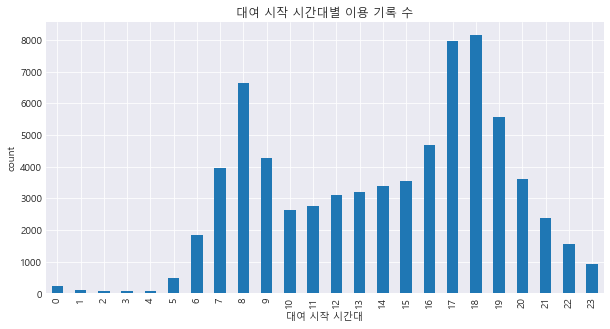

In [ ]:
plt.figure(figsize=(10,5))

# 시간순으로 정렬
df_cut['start_hour'].value_counts().sort_index(ascending=True).plot(kind='bar')
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show()

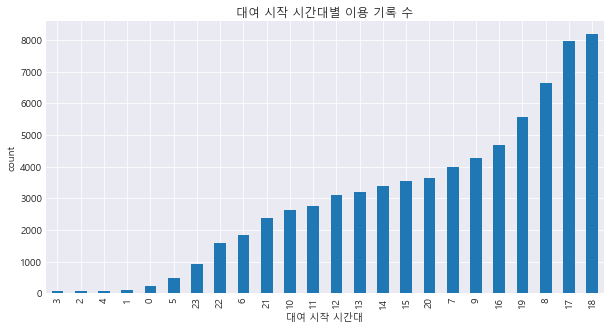

In [ ]:
# 빈도순으로 정렬
plt.figure(figsize=(10,5))
df_cut['start_hour'].value_counts(ascending=True).plot(kind='bar') #default=False
plt.xlabel('대여 시작 시간대')
plt.ylabel('count')
plt.title('대여 시작 시간대별 이용 기록 수')
plt.show() 

**해석**
> 주로 오후 5-6시가 가장 많은 대여 건수를 보였고, 그 다음은 오전 8시가 많았다. 뉴욕 기준 퇴근과 출근 시간대의 양상을 반영하고 있다.
> <br/> 새벽 시간대 특히 0시 ~ 4시에서 대여 건수가 지나치게 낮다.

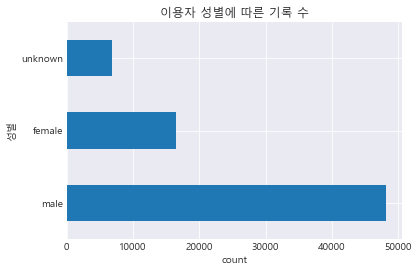

In [ ]:
# 성별 (gender) 의 빈도표
plt.figure()
df_cut['gender'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('성별')
plt.title('이용자 성별에 따른 기록 수')
plt.show()

**해석**
> 남성 사용자 48310명으로, 여성 사용자 16568명에 비해 3배 가량 많았다.

#### 3.2.2 범주형 변수가 30개 이상일 때, 빈도표(Counting and Basic Frequency Plots)
>30개가 넘지 않더라도, 범주형 변수의 고유 값이 X축에 전부 표현되기 어렵다면

범주형 변수의 고유값이 많을 때, 상위 또는 하위 n개로 자르고 Horizontal로 시각화

In [ ]:
# start_station 대여 시작 지점별 빈도
df_cut['start_station_name'].value_counts().nlargest(10)

Pershing Square North    749
West St & Chambers St    504
Broadway & E 22 St       501
W 21 St & 6 Ave          468
8 Ave & W 33 St          443
E 17 St & Broadway       442
E 47 St & Park Ave       441
W 41 St & 8 Ave          436
W 22 St & 10 Ave         431
W 38 St & 8 Ave          407
Name: start_station_name, dtype: int64

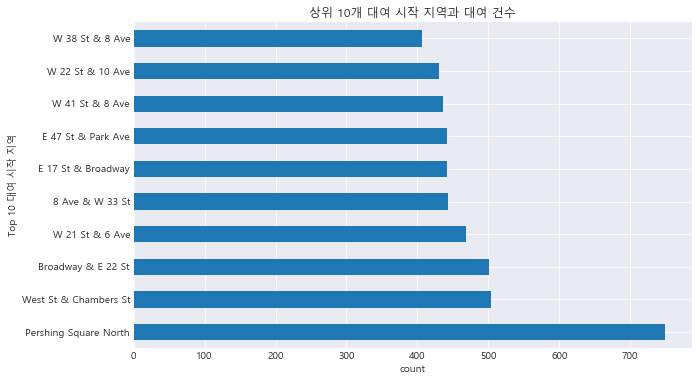

In [ ]:
plt.figure(figsize=(10,6))
df_cut['start_station_name'].value_counts().nlargest(10).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('Top 10 대여 시작 지역')
plt.title('상위 10개 대여 시작 지역과 대여 건수')
plt.show()

#### 3.3 이 외에도 자주 등장하는 분포에 대해서 알아 봅시다!

1. 정규분포
2. 롱테일/파레토 분포 (Poisson, Lognormal, Exponential)
3. 이항분포 (Bernoulli)
4. 균등분포

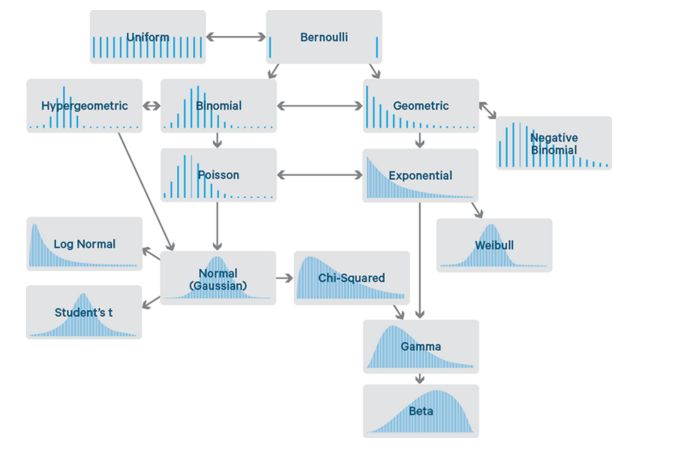

### 번외

> 상관관계 구하기! (Pearson 상관계수)

In [ ]:
pearson_corr = df[['trip_duration_min','start_station_latitude','start_station_longitude']].corr(method='pearson')
pearson_corr

,trip_duration_min,start_station_latitude,start_station_longitude
trip_duration_min,1.000000,-0.001261,0.002523
start_station_latitude,-0.001261,1.000000,0.324510
start_station_longitude,0.002523,0.324510,1.000000


***

> ## &#128205;  **EDA Quest**
>
> #### 주어진 데이터셋을 바탕으로 아래의 질문에 대한 자신만의 해답을 코드와 함께 **간단하게**(약 2-3줄 내외) 적어 제출해주세요!
 
 *   *airbnb.csv*  관련 문제
     1.   'price', 'review_scores_rating', 'latitude'에 대해서 변수의 종류는 무엇이며, 분포는 어떻게 되어있나요? 각 변수의 특징과 함께 서술해주세요!
     2.   위의 데이터에 이상치/결측치가 있나요? 있다면 어떻게 처리해야 할까요?
     3.   위의 데이터에서 이상치/결측치를 처리 한 후 'neighbourhood' 변수와 price 간의 관계를 파악해 주세요. (상위 10개 지역에 대해서)
     4.   임의의 양적 변수를 정하고, price와 어떤 관계가 있는지 pearson 상관계수를 구한 후 시각화 해주세요.